# TensorFlow 2.0 and Keras Basics

### Ahmed J. Zerouali (2021/08/18)

I am building my very first neural network in this notebook. This is from Section 25 (Neural Nets and Deep Learning) of Pierian Data's DSML course, starting with Lecture 134. Lectures 123 to 133 of that section review the theory of neural networks, which will be summarized elsewhere. 

## Contents

1) Basic imports - Dataset

2) Creating and Training a Neural Net

3) Evaluating, Predicting and Saving a Model


____________

## 1) Basic imports - Dataset

This is form Lecture 134.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# I'm still not sure about what this does exactly...
%matplotlib inline

In [4]:
df_reg = pd.read_csv("fake_reg.csv")

In [5]:
df_reg

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [6]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


* Split data into training and testing subsets:

In [10]:
from sklearn.model_selection import train_test_split

* TensorFlow uses Numpy arrays instead of Pandas series. Have to convert values in df_reg to np arrays:

In [7]:
arr_reg = df_reg.values

In [8]:
type(arr_reg)

numpy.ndarray

In [13]:
arr_reg

array([[ 461.52792939,  999.78755752,  999.7660962 ],
       [ 548.13001146,  998.86161491, 1001.04240315],
       [ 410.29716167, 1000.07026691,  998.84401463],
       ...,
       [ 456.72099249, 1001.45164617,  998.84760554],
       [ 403.31557562, 1000.77102275,  998.56285086],
       [ 599.36709348,  999.2322436 , 1001.45140713]])

In [57]:
X = arr_reg[:,1:]
y = arr_reg[:,0]

* Used train_test_split on Pandas dataframes before, but it also works with np arrays:

In [61]:
[X_train, X_test, y_train, y_test] = train_test_split(X,y, test_size= 0.3, random_state = 42)

* Should normalize and scale feature data. Portilla calls **MinMaxScaler** from Scikit Learn. Important when dealing with neural nets.

In [65]:
from sklearn.preprocessing import MinMaxScaler

* The scaler itself has to be instantiated like a model:

In [66]:
scaler = MinMaxScaler()

In [67]:
scaler.fit(X_train)

MinMaxScaler()

* We execute the above on the training set to avoid *data leakage*
* Portilla: The scaler computes the std of the data set, as well as some parameters depending on the min and the max of the values. The resulting values are normalized to be in [0,1].
* Next, transform the data using the scaler:

In [68]:
X_train = scaler.transform(X_train)

In [69]:
X_test = scaler.transform(X_test)

## 2) Creating and Training a Neural Net

Here starts Lecture 135. 

There are 2 imports to do to create a basic neural net (Portilla: Check-out help on these functions):

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

* The **Sequential** class is the neural net, takes layers as args in constructor.
* **Dense layer:** A dense layer is one where every neuron is connected to all neurons of the next layer. 
* Dense layers Encoded as the class **Dense** in Keras. Important attributes we'll use are **units = *no. of neurons***, and **activation = *function*** . 

In [72]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

In [71]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along a

* One way to construct the network is by specifying all layers in the instantiation.

In [ ]:
nn_model_1 = Sequential([Dense(4, activation = "relu"), Dense(2, activation = "relu"), Dense(1)])

* Portilla prefers to create an empty net, and then add layers to it with the ***Sequantial_obj*.add()** method. Easier if we want to remove/add layers to the model.
* Should produce "in-depth" notes of the attributes and methods of these classes.
* Last layer is quite important, has to match the size of the output we want. In our example, we want to predict a price, so the output of our network should be a scalar.
* **What about the input layer?**
* The output will be measured in terms of a loss function
* After adding layers, one compiles the model using the **Sequential.compile()** method. As arguments for this method, we pass-in the loss function and the optimizer.
* There are many other parameters for *Sequential.compile()* which will be discussed later.

* The following is from Pierian Data's notebook (Keras Syntax Basics), for choosing an optimizer and a loss function:

    **For a multi-class classification problem**
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    **For a binary classification problem**
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    **For a mean squared error regression problem**
    model.compile(optimizer='rmsprop',
                  loss='mse')
* **Where's the documentation for loss functions and optimizers?**

In [76]:
# Create empty net
nn_model = Sequential()
# Add hidden layers
nn_model.add(Dense(units = 4, activation = "relu"))
nn_model.add(Dense(units = 4, activation = "relu"))
nn_model.add(Dense(units = 4, activation = "relu"))
# Output layer (node)
nn_model.add(Dense(units = 1))
# Compile model
nn_model.compile(optimizer="rmsprop", loss = "mse")


* Now we train the model with the **Sequential.fit()** method.
* The main arguments of *Sequential.fit()* that we're concerned with here are **x** (features/input), **y** (target data) and **epochs** (number of complete iterations over *x* and *y*).
* Later: Will discuss how to choose number of epochs appropriately and use *callback* argument.
* Portilla mentions the **verbose** argument, which says whether or not the model prints out short reports during training.

In [80]:
nn_model.fit(x=X_train, y=y_train, epochs = 250, verbose = 2)

Epoch 1/250
22/22 - 1s - loss: 256630.8125
Epoch 2/250
22/22 - 0s - loss: 256483.1562
Epoch 3/250
22/22 - 0s - loss: 256315.9531
Epoch 4/250
22/22 - 0s - loss: 256094.9531
Epoch 5/250
22/22 - 0s - loss: 255825.0000
Epoch 6/250
22/22 - 0s - loss: 255554.2188
Epoch 7/250
22/22 - 0s - loss: 255275.9375
Epoch 8/250
22/22 - 0s - loss: 254976.2031
Epoch 9/250
22/22 - 0s - loss: 254648.2031
Epoch 10/250
22/22 - 0s - loss: 254281.7188
Epoch 11/250
22/22 - 0s - loss: 253870.2812
Epoch 12/250
22/22 - 0s - loss: 253405.6719
Epoch 13/250
22/22 - 0s - loss: 252882.6562
Epoch 14/250
22/22 - 0s - loss: 252297.6406
Epoch 15/250
22/22 - 0s - loss: 251645.7812
Epoch 16/250
22/22 - 0s - loss: 250926.3125
Epoch 17/250
22/22 - 0s - loss: 250131.5156
Epoch 18/250
22/22 - 0s - loss: 249253.2344
Epoch 19/250
22/22 - 0s - loss: 248293.5312
Epoch 20/250
22/22 - 0s - loss: 247239.7969
Epoch 21/250
22/22 - 0s - loss: 246100.6875
Epoch 22/250
22/22 - 0s - loss: 244859.8438
Epoch 23/250
22/22 - 0s - loss: 243499.98

Epoch 195/250
22/22 - 0s - loss: 24.0502
Epoch 196/250
22/22 - 0s - loss: 23.9830
Epoch 197/250
22/22 - 0s - loss: 24.4186
Epoch 198/250
22/22 - 0s - loss: 24.0795
Epoch 199/250
22/22 - 0s - loss: 24.0280
Epoch 200/250
22/22 - 0s - loss: 24.4755
Epoch 201/250
22/22 - 0s - loss: 24.4811
Epoch 202/250
22/22 - 0s - loss: 24.5554
Epoch 203/250
22/22 - 0s - loss: 24.3218
Epoch 204/250
22/22 - 0s - loss: 25.0202
Epoch 205/250
22/22 - 0s - loss: 24.0494
Epoch 206/250
22/22 - 0s - loss: 23.9844
Epoch 207/250
22/22 - 0s - loss: 24.2191
Epoch 208/250
22/22 - 0s - loss: 24.2709
Epoch 209/250
22/22 - 0s - loss: 24.5618
Epoch 210/250
22/22 - 0s - loss: 24.2864
Epoch 211/250
22/22 - 0s - loss: 24.2647
Epoch 212/250
22/22 - 0s - loss: 24.5261
Epoch 213/250
22/22 - 0s - loss: 24.5002
Epoch 214/250
22/22 - 0s - loss: 24.1299
Epoch 215/250
22/22 - 0s - loss: 24.6172
Epoch 216/250
22/22 - 0s - loss: 24.4883
Epoch 217/250
22/22 - 0s - loss: 24.3990
Epoch 218/250
22/22 - 0s - loss: 24.8370
Epoch 219/250
22

* Next point Portilla addresses is the fitting history. The *Sequential* class keeps a history of the epochs, which can be accessed with the **Sequential.history.history** attribute. This is a dictionary that stores the history of the loss function values throughout the epochs.

In [83]:
nn_model.history.history

{'loss': [256630.8125,
  256483.15625,
  256315.953125,
  256094.953125,
  255825.0,
  255554.21875,
  255275.9375,
  254976.203125,
  254648.203125,
  254281.71875,
  253870.28125,
  253405.671875,
  252882.65625,
  252297.640625,
  251645.78125,
  250926.3125,
  250131.515625,
  249253.234375,
  248293.53125,
  247239.796875,
  246100.6875,
  244859.84375,
  243499.984375,
  242037.09375,
  240462.765625,
  238772.046875,
  236946.03125,
  234992.359375,
  232892.1875,
  230659.3125,
  228263.6875,
  225740.734375,
  223056.234375,
  220202.265625,
  217192.0625,
  213993.53125,
  210621.765625,
  207089.578125,
  203375.890625,
  199488.5,
  195390.28125,
  191131.171875,
  186709.109375,
  182081.296875,
  177244.1875,
  172269.78125,
  167117.875,
  161748.59375,
  156228.84375,
  150518.71875,
  144659.296875,
  138675.296875,
  132542.296875,
  126294.1171875,
  119954.171875,
  113471.4609375,
  106903.1640625,
  100283.78125,
  93595.65625,
  86932.5,
  80218.3984375,
  73534.

In [88]:
df_history_model_loss = pd.DataFrame(data = nn_model.history.history)

<AxesSubplot:>

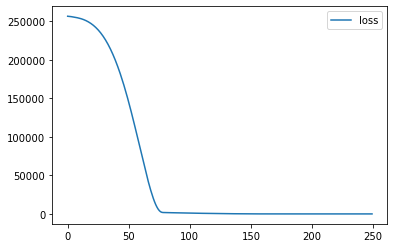

In [94]:
# Elagant plotting
df_history_model_loss.plot()

Text(0.5, 1.0, 'MSE loss history of nn_model')

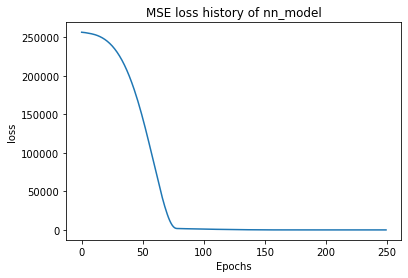

In [93]:
# Quick and dirty plotting
t = np.arange(0,len(nn_model.history.history["loss"]))
plt.plot(t, np.array(nn_model.history.history["loss"]) )
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("MSE loss history of nn_model")

In [91]:
type(nn_model.history.history["loss"])

list

## 3) Evaluating, Predicting and Saving

This is Lecture 136.

### a) Evaluating a model

* The first method introduced is **Sequential.evaluate()**, which takes as input the test data *x* and the test targets *y*, and outputs the resulting loss (MSE here):

In [96]:
nn_model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 997us/step - loss: 24.9485


24.94853401184082

* Next, we use the model to make predictions. Quite close to the Scikit Learn syntax still:

In [101]:
y_predict = nn_model.predict(X_test, verbose = 1)

10/10 [==============================] - 0s 829us/step


* Portilla converts the predictions and test values into a dataframe and produces a scatter plot.

Text(0.5, 1.0, 'Predicted values vs true values in test data')

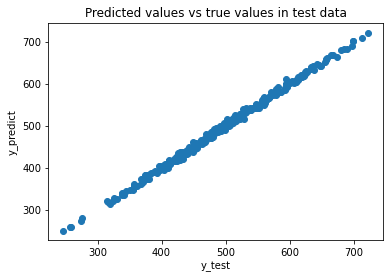

In [103]:
plt.scatter(x = y_test, y = y_predict)
plt.xlabel("y_test")
plt.ylabel("y_predict")
plt.title("Predicted values vs true values in test data")

* We now look at the various error measures for predictions in the case of our neural net predictions.
* Portilla imports the **mean_squared_error** and the **mean_absolute_error** functions from Scikit Learn.
* Both of these functions take test and prediction arrays as arguments *y_true* and *y_pred*.

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [109]:
print(f"Mean Squared Error = {mean_squared_error(y_test,y_predict)}\n")
print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_predict)}")

Mean Squared Error = 24.94853592599558

Mean Absolute Error = 3.998640380382645


## b) Predicting on new data

* Starting at 10min, Portilla discusses how we use the model to predict a *new* price (i.e. not training or test). Recalling that we trained the neural network on scaled data, so in order to make an accurate prediction, we must scale the new data using the scaler object previously created:

In [111]:
# 
new_data = np.array([[998, 1000]])

y_new = nn_model.predict(scaler.transform(new_data))

print(f"The price of the new object is y_new ={y_new }")

The price of the new object is y_new =[[419.51068]]


## c) Saving and loading a model (VERY IMPORTANT)


The last topic in Lecture 136 is saving and loading a *trained* neural net. 

* Saving a model uses the **Sequential.save()** method. The files can be saved either in *tf* format or *h5* (Hierarchical Data Format 5, see: https://en.wikipedia.org/wiki/Hierarchical_Data_Format).
* To load a model, we use the  **load_model()** from Keras (*tensorflow.keras.models*).
* This function loads a model and compiles it by default. The first argument is the filepath string.


In [112]:
from tensorflow.keras.models import load_model

In [115]:
nn_model.save("nn_model_00_AJZer.h5")

In [116]:
model_00 = load_model("nn_model_00_AJZer.h5")

In [118]:
# Test loaded model on new data 
y00_pred = model_00.predict(scaler.transform(new_data))

In [119]:
y00_pred

array([[419.51068]], dtype=float32)